In [60]:
import pandas as pd
import numpy as np
from typing import List, Tuple, Literal, Generator, TypeVar
from numpy.typing import NDArray
import itertools
import math
import matplotlib.pyplot as plt
import random

In [9]:
A = TypeVar("A")

def get_transitions(series: List[A], step=1) -> List[Tuple[A, A]]:
    cycled_series = series[step:] + series[:step]
    return list(zip(series, cycled_series))

def transition_matrix(transitions: List[Tuple[A, A]]) -> NDArray[np.integer]:
    element, next_element = zip(*transitions)
    crosstab = pd.crosstab(element, next_element)
    return np.matrix(crosstab)

def correlation(matrix: NDArray[np.integer]) -> float:
    if matrix.shape != (2, 2):
        raise ValueError("The input matrix must be 2x2")

    main_diagonal_product = matrix[0, 0] * matrix[1, 1]
    other_diagonal_product = matrix[0, 1] * matrix[1, 0]
    difference = main_diagonal_product - other_diagonal_product

    row_sums = matrix.sum(axis=1)
    col_sums = matrix.sum(axis=0)
    product_of_sums = np.prod(row_sums) * np.prod(col_sums)

    sqrt_product_of_sums = np.sqrt(product_of_sums)

    return difference / sqrt_product_of_sums

def correlation_ranges(series: List[A]) -> Generator[float, None, None]:
    step = 0
    while True:
        transitions = get_transitions(series, step=step)
        matrix = transition_matrix(transitions)
        current_correlation = correlation(matrix)
        yield current_correlation
        step += 1

In [70]:
sonnet = list(14 * ((5 * "u-") + "u"))

limerick = list(2 * "u-uu-uu-u" + 2 * "u-uu-" + "u-uu-uu-u")

def syllables(k: int=1):
    return random.choices(["-", "u"], k=k)

def get_sapphic(k: int = 1):
    result = []
    for _ in range(k):
        for _ in range(3):
            sapphic = list("-u-") + syllables() + list("-uu-u-") + syllables()
            result.extend(sapphic)
        adonic = list("-uu-") + syllables()
        result.extend(adonic)
    return result

    
def get_hexameter(k: int = 1):
    result = []
    for _ in range(k):
        hexameter = list("".join(random.choices(["-uu", "--"], k=5)) + random.choice(["--", "-u"]))
        result.extend(hexameter)
    return result

def get_phalaecean(k: int = 1):
    result = []
    for _ in range(k):
        phalaecean = list(random.choice(["--", "-u", "u-"]) + "-uu-u-u-" + random.choice(["-", "u"]))
        result.extend(phalaecean)
    return result

def get_elegiac_distich(k: int = 1):
    result = []
    for _ in range(k):
        result.extend(get_hexameter())
        pentameter = list("-" + random.choice(["-", "uu"]) + "-" + random.choice(["-", "uu"]) + "-uu-uu" + random.choice(["-", "u"]))
        result.extend(pentameter)
    return result

def get_shloka(k: int = 1):
    result = []
    for _ in range(k * 2):
        shloka = list("".join(random.choices(["u", "-"], k=4)) + "u--" + random.choice(["u", "-"]) + "".join(random.choices(["u", "-"], k=4)) + "u-u" + random.choice(["u", "-"]))
        result.extend(shloka)
    return result

In [112]:
farthest_range = 16 + 1

analyze_metre = lambda metre: pd.Series(itertools.islice(correlation_ranges(metre), farthest_range))

df = pd.DataFrame()
df["Hexameters"] = analyze_metre(get_hexameter(k=700))
df["Limerick"] = analyze_metre(limerick)
df["Distich"] = analyze_metre(get_elegiac_distich(k=400))
df["Phalaecean"] = analyze_metre(get_phalaecean(k=20))
df["Sonnet"] = analyze_metre(sonnet)
df["14 Sonnets"] = analyze_metre(14 * sonnet + get_hexameter(k=20) + get_sapphic(k=3))
df["Shloka"] = analyze_metre(get_shloka(k=50))
df["Sapphic"] = analyze_metre(get_sapphic(k=8))
df["Random"] = analyze_metre(syllables(k=400))

lol = list("------------------------------------------------------u----------------------------")
df["lol"] = analyze_metre(lol)

In [108]:
(transition_matrix(get_transitions(lol, step=10)))

matrix([[81,  1],
        [ 1,  0]])

/run/user/1000/ipykernel_238674/3830853690.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (summary_df["range"][i], summary_df["strength"][i]))


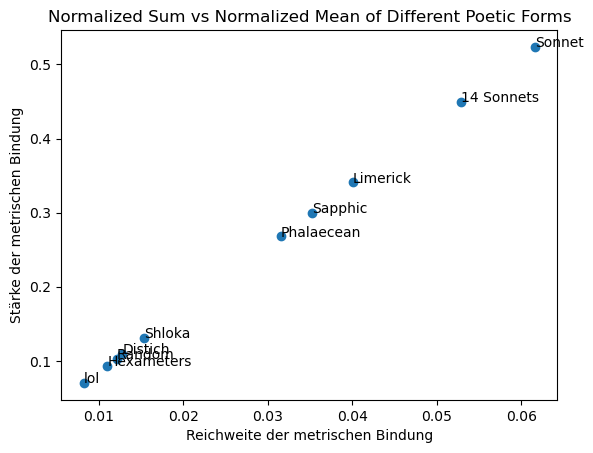

In [113]:
# Calculate sum and mean for each column
max_sum = sums.max() / len(df)
max_mean = means.max()
normalized_sums = sums
normalized_means = means / max_mean

# Create a DataFrame for the normalized sums and means
summary_df = pd.DataFrame({
    'strength': df.abs().sum() / len(df), 
    'range': df.abs().mean() / (len(df)/2)}
)

# Plot scatter plot with normalized axes
fig, ax = plt.subplots()
ax.scatter(summary_df["range"], summary_df["strength"])

# Add labels
for i, txt in enumerate(summary_df.index):
    ax.annotate(txt, (summary_df["range"][i], summary_df["strength"][i]))

# Display the plot
plt.ylabel('Stärke der metrischen Bindung')
plt.xlabel('Reichweite der metrischen Bindung')
plt.title('Normalized Sum vs Normalized Mean of Different Poetic Forms')
plt.show()
